In [1]:
from src.class_names import get_class_names
from src.data_loaders import get_data_loaders
from src.utils import counter
from src.cnn_model import create_cnn_model

2023-06-17 06:56:56.548581: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-17 06:56:56.575886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 06:56:56.989514: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_dir = 'data/train'
test_dir = 'data/test'

In [3]:
class_names, num_classes = get_class_names(train_dir)
print(class_names)
print(f'Number of Classes: {num_classes}')

['cats' 'dogs']
Number of Classes: 2


In [4]:
img_size = 128
batch_size = 32

In [5]:
train_ds,  test_ds = get_data_loaders(train_dir, test_dir, img_size, batch_size)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Total Files: 20000


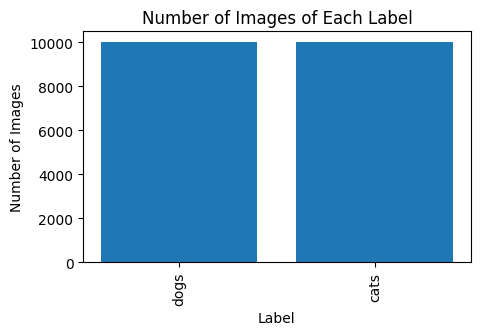

In [6]:
images, labels = next(train_ds)

counter(train_dir)

In [7]:
input_shape = (img_size, img_size, 3)

In [8]:
model = create_cnn_model(input_shape, num_classes)

2023-06-17 06:57:06.527952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-17 06:57:06.545957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-17 06:57:06.546077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     18944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 256)       1605888   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        73760 

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data = test_ds,
                    )

Epoch 1/10


2023-06-17 06:57:14.523913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-17 06:57:24.983088: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 256.00MiB (rounded to 268435456)requested by op model/conv2d/Relu
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-06-17 06:57:24.983139: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-06-17 06:57:24.983149: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 36, Chunks in use: 36. 9.0KiB allocated for chunks. 

ResourceExhaustedError: Graph execution error:

Detected at node 'model/conv2d/Relu' defined at (most recent call last):
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_65431/2790068021.py", line 1, in <module>
      history = model.fit(train_ds,
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/zahid/miniconda3/envs/cnncls/lib/python3.8/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'model/conv2d/Relu'
OOM when allocating tensor with shape[32,128,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model/conv2d/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1460]